In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train=pd.read_csv('AMZN.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-11,62.987000,63.838501,62.823002,63.834000,63.834000,62500000
1,2018-01-12,63.669498,65.288002,63.669498,65.260002,65.260002,108874000
2,2018-01-16,66.150002,66.997002,64.614998,65.242996,65.242996,144414000
3,2018-01-17,65.612000,65.699997,64.043999,64.750000,64.750000,105076000
4,2018-01-18,64.697502,65.230003,64.200996,64.666000,64.666000,80538000


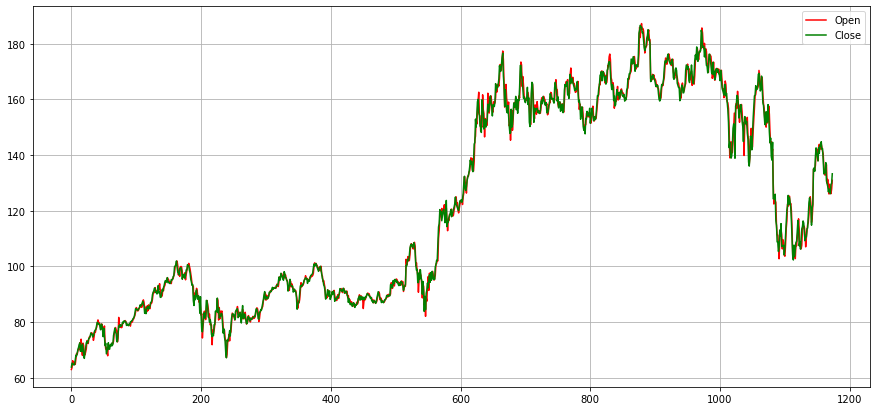

In [4]:
plt.figure(figsize=(15,7))
dataset_train['Open'].plot(color='r')
dataset_train['Close'].plot(color='g')
plt.grid()
plt.legend()

In [5]:
training_set = dataset_train.iloc[:, 4:5].values

In [6]:
training_set.shape

(1174, 1)

In [7]:
training_set


array([[ 63.834   ],
       [ 65.260002],
       [ 65.242996],
       ...,
       [129.479996],
       [129.820007],
       [133.270004]])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Incorporating Timesteps Into Data

In [10]:
X_train = []
y_train = []
for i in range(60, 1174):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Creating the LSTM Model

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
35/35 [==============================] - 19s 184ms/step - loss: 0.0436
Epoch 2/20
35/35 [==============================] - 6s 183ms/step - loss: 0.0065
Epoch 3/20
35/35 [==============================] - 6s 160ms/step - loss: 0.0061
Epoch 4/20
35/35 [==============================] - 6s 160ms/step - loss: 0.0062
Epoch 5/20
35/35 [==============================] - 6s 161ms/step - loss: 0.0063
Epoch 6/20
35/35 [==============================] - 6s 163ms/step - loss: 0.0053
Epoch 7/20
35/35 [==============================] - 6s 185ms/step - loss: 0.0052
Epoch 8/20
35/35 [==============================] - 8s 217ms/step - loss: 0.0052
Epoch 9/20
35/35 [==============================] - 7s 193ms/step - loss: 0.0049
Epoch 10/20
35/35 [==============================] - 7s 209ms/step - loss: 0.0051
Epoch 11/20
35/35 [==============================] - 6s 180ms/step - loss: 0.0045
Epoch 12/20
35/35 [==============================] - 6s 176ms/step - loss: 0.0043
Epoch 13/20
35/35 [=====

In [13]:
dataset_test=pd.read_csv("AMZN.csv")

In [14]:
real_stock_price = dataset_test.iloc[:, 4:5].values

In [15]:
dataset_test.shape

(1174, 7)

In [16]:
length=len(dataset_test)
length

1174

In [17]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values 

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60,1174):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

35/35 [==============================] - 5s 62ms/step


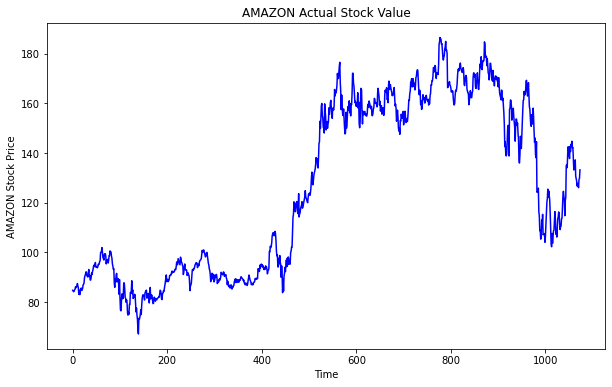

In [26]:
plt.figure(figsize=(10,6))
plt.plot(real_stock_price[100:], color = 'b', label = 'TATA Stock Price')

plt.title('AMAZON Actual Stock Value')
plt.xlabel('Time')
plt.ylabel('AMAZON Stock Price')

plt.show()


Text(0.5, 1.0, 'AMAZON predicted stock value')

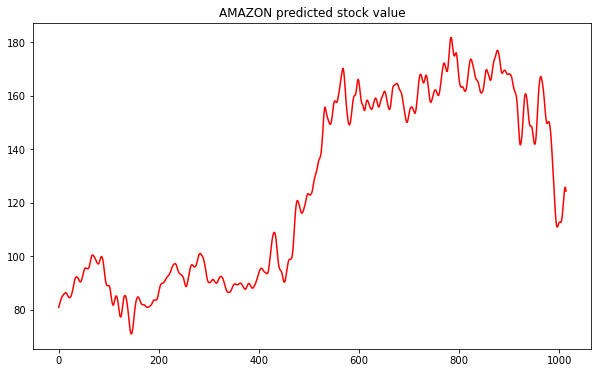

In [31]:
plt.figure(figsize=(10,6))
plt.plot(predicted_stock_price[100:], color = 'r')
plt.title("AMAZON predicted stock value")

In [35]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(predicted_stock_price,real_stock_price[60:]))

18.40503721290972

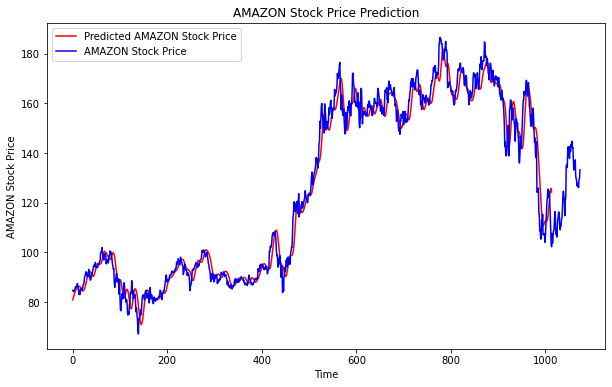

In [33]:
plt.figure(figsize=(10,6))
plt.plot(predicted_stock_price[100:], color = 'r', label = 'Predicted AMAZON Stock Price')

plt.plot(real_stock_price[100:], color = 'b', label = 'AMAZON Stock Price')

plt.title('AMAZON Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMAZON Stock Price')
plt.legend()

plt.show()
